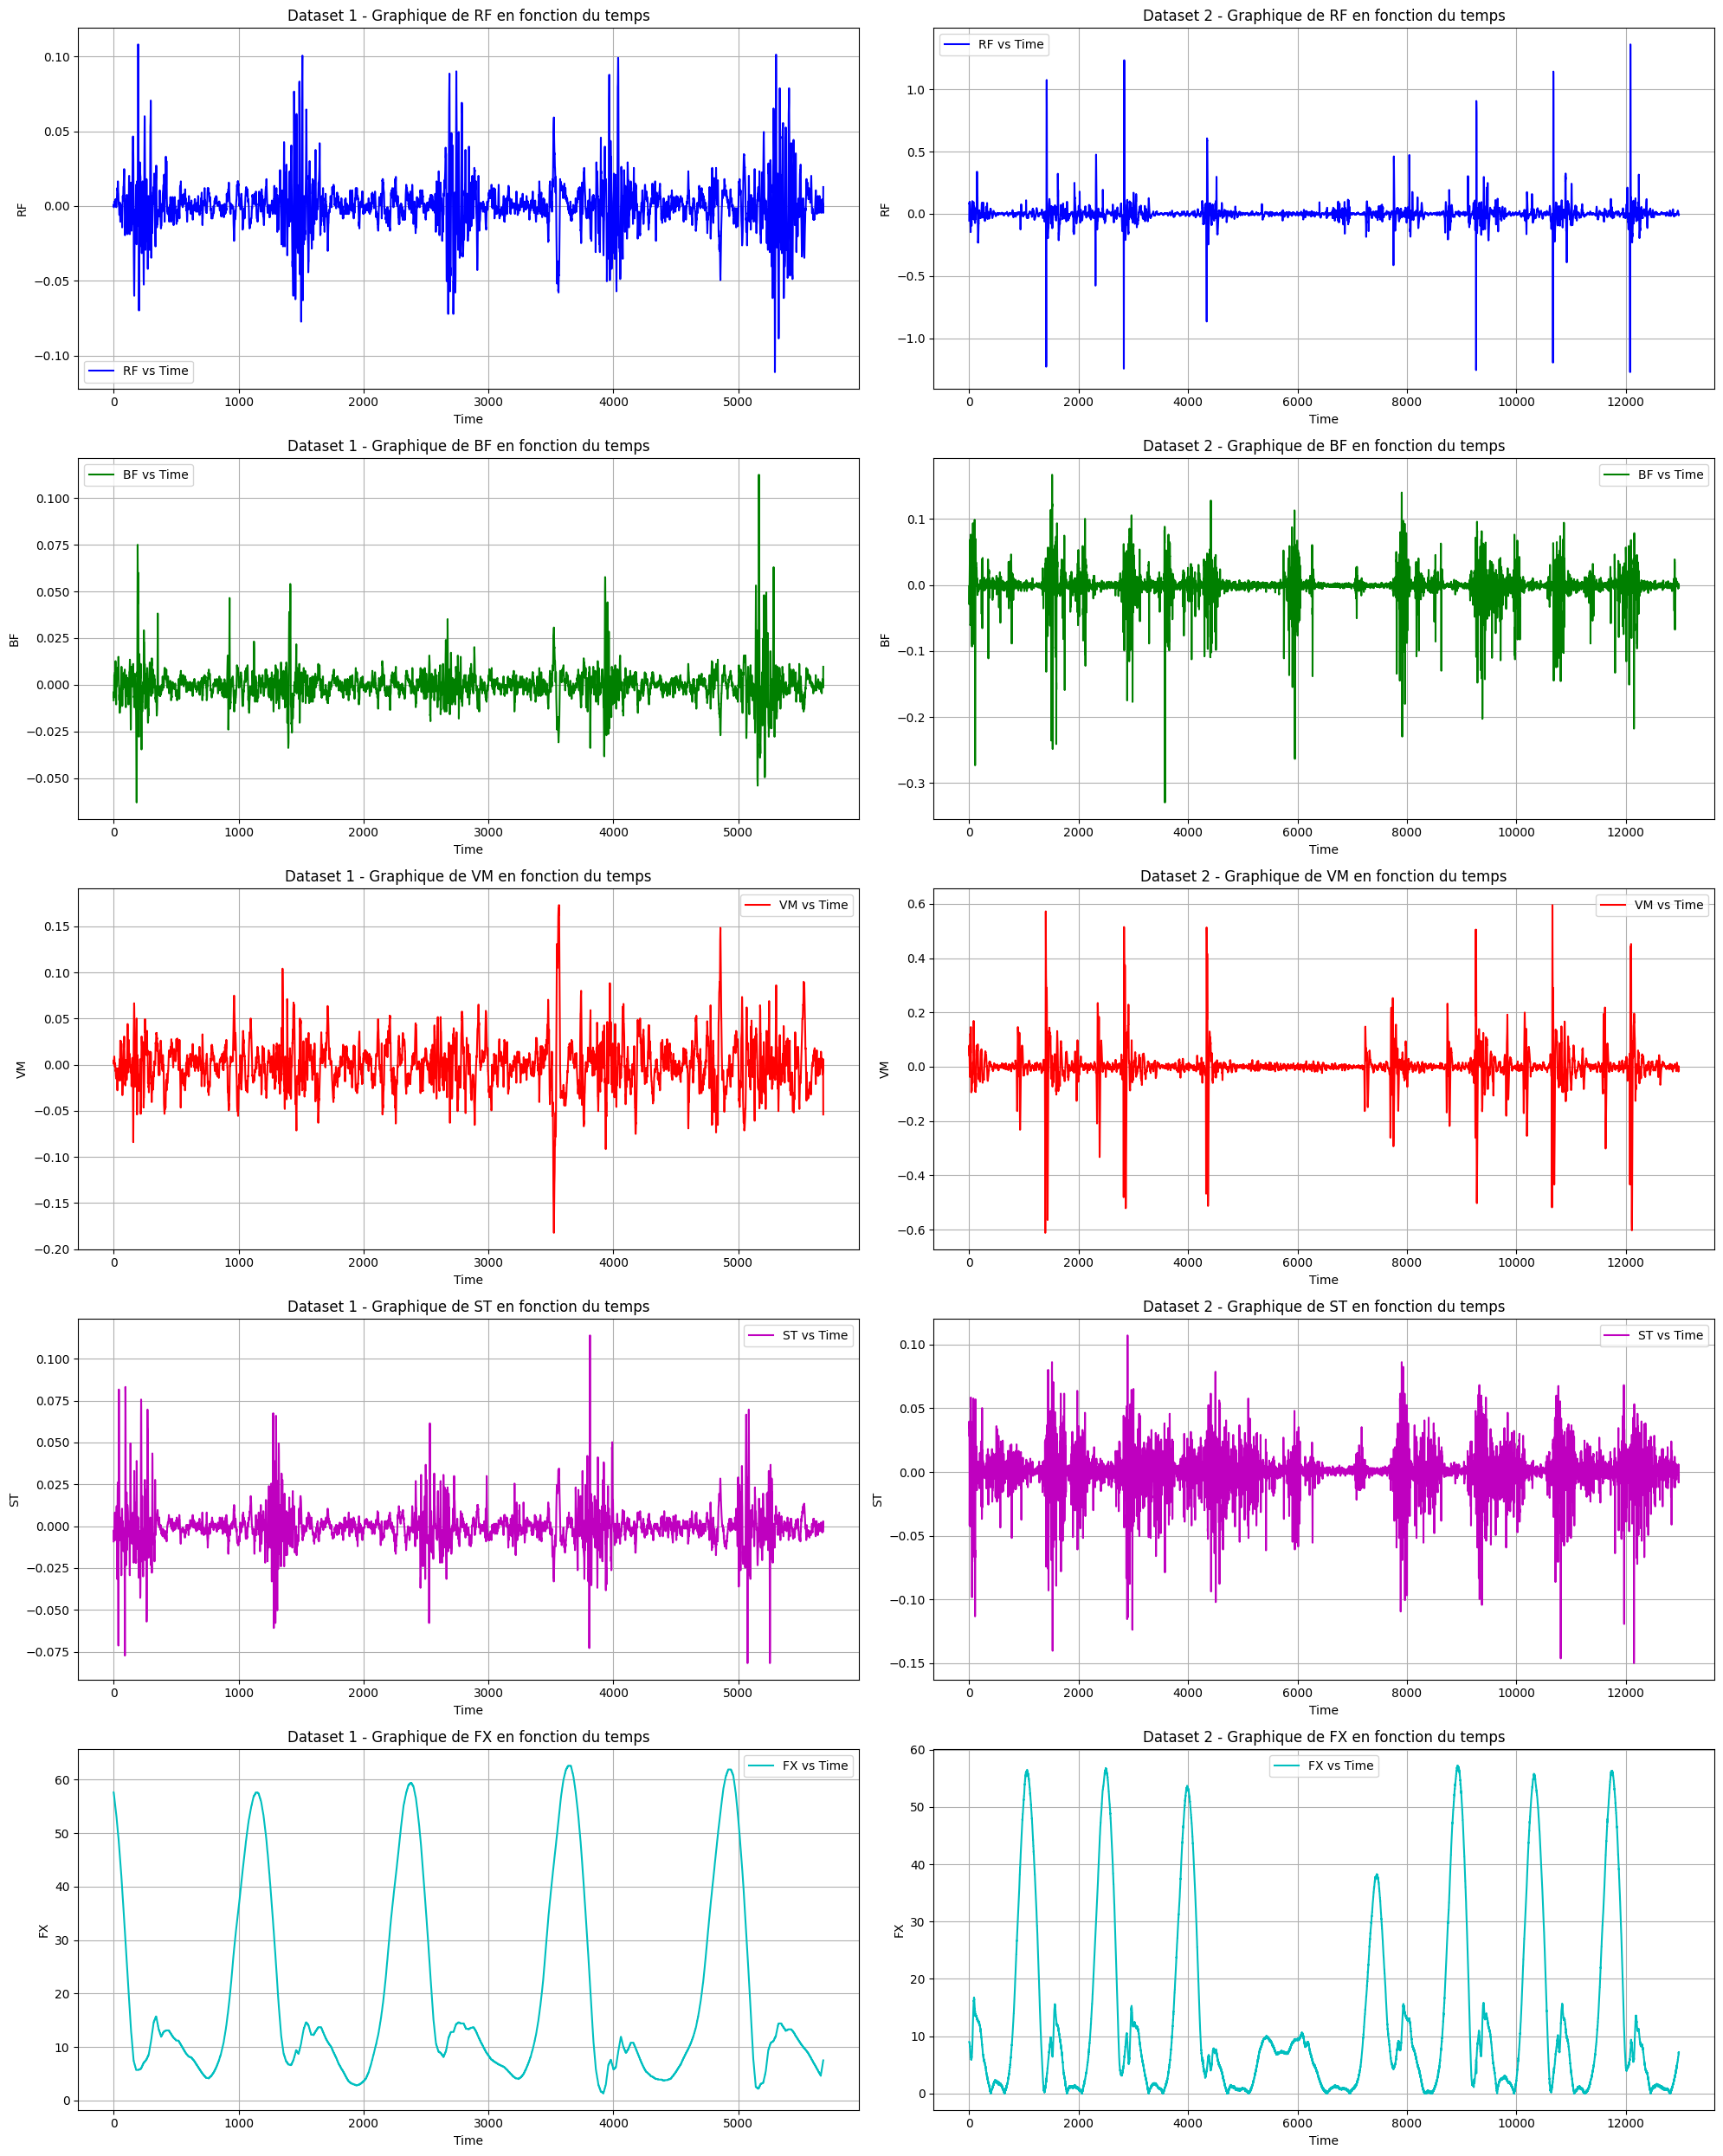

In [5]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# Charger les fichiers texte
file_path1 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/1Nmar.txt'
file_path2 = 'emg+dataset+in+lower+limb/SEMG_DB1/A_TXT/1Amar.txt'

def load_and_process_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        # Supprimer les 6 premières lignes de content
        content = '\n'.join(content.split('\n')[6:])
        
    # Convertir le contenu en DataFrame
    data = pd.read_csv(StringIO(content), sep='\t', header=None, names=['RF', 'BF', 'VM', 'ST', 'FX'])
    
    
    # Supprimer les lignes contenant des valeurs NaN
    data.dropna(inplace=True)
    
    # Ajouter une colonne de temps basée sur l'index
    data['Time'] = data.index
    
    return data

# Charger et traiter les deux jeux de données
data1 = load_and_process_data(file_path1)
data2 = load_and_process_data(file_path2)
data2['FX'] = data2['FX'].abs()

# Fonction pour créer des graphiques côte à côte
def plot_data_side_by_side(data1, data2):
    fig, axs = plt.subplots(5, 2, figsize=(20, 25))

    columns = ['RF', 'BF', 'VM', 'ST', 'FX']
    colors = ['b', 'g', 'r', 'm', 'c']
    
    for i, col in enumerate(columns):
        # Graphique pour data1
        axs[i, 0].plot(data1['Time'], data1[col], label=f'{col} vs Time', color=colors[i])
        axs[i, 0].set_xlabel('Time')
        axs[i, 0].set_ylabel(col)
        axs[i, 0].set_title(f'Dataset 1 - Graphique de {col} en fonction du temps')
        axs[i, 0].legend()
        axs[i, 0].grid(True)
        
        # Graphique pour data2
        axs[i, 1].plot(data2['Time'], data2[col], label=f'{col} vs Time', color=colors[i])
        axs[i, 1].set_xlabel('Time')
        axs[i, 1].set_ylabel(col)
        axs[i, 1].set_title(f'Dataset 2 - Graphique de {col} en fonction du temps')
        axs[i, 1].legend()
        axs[i, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Créer des graphiques côte à côte pour les deux jeux de données
plot_data_side_by_side(data1, data2)
